In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns

## Load feature layer 26 output 


In [3]:
%pwd

'/home/qzt/stardist/examples/2D'

In [7]:
dsb = np.load('featurelayer26_output+idx_patch256_rep2_dsb2018_stardistAUG.npy')
centuri = np.load('featurelayer26_output+idx_patch256_rep20_centuri_stardistAUG.npy')

dsb.shape, centuri.shape

((894, 524290), (100, 524290))

In [8]:
# dsb = dsb.reshape((dsb.shape[0],-1))
# centuri = centuri.reshape((centuri.shape[0],-1))

# dsb.shape, centuri.shape

In [9]:
comb = np.concatenate((dsb, centuri))
comb.shape

(994, 524290)

In [29]:
# np.save('l26_comb_994_524288.npy', comb)

## prepare the labels array 
first 894 elements are the dsb and last 100 are centuri

the first two columns are 1)serial number of the images patches (filename) 2)the sequence of the original images (using sort glob...)

In [10]:
label = comb[:, :2]
label = label.astype(int)
label.shape

(994, 2)

create another two columns, one is the indicator for dsb or centuri data, another is empty for annotions by tf projector

In [11]:
label2 = np.zeros((994,2),dtype=int)
label2[894:, 0] = 1
label3 = np.c_[label, label2]
label3 = label3.astype(int)
label3[-150:]

array([[845, 397,   0,   0],
       [846, 398,   0,   0],
       [847, 399,   0,   0],
       [848, 400,   0,   0],
       [849, 401,   0,   0],
       [850, 402,   0,   0],
       [851, 403,   0,   0],
       [852, 404,   0,   0],
       [853, 405,   0,   0],
       [854, 406,   0,   0],
       [855, 407,   0,   0],
       [856, 408,   0,   0],
       [857, 409,   0,   0],
       [858, 410,   0,   0],
       [859, 411,   0,   0],
       [860, 412,   0,   0],
       [861, 413,   0,   0],
       [862, 414,   0,   0],
       [863, 415,   0,   0],
       [864, 416,   0,   0],
       [865, 417,   0,   0],
       [866, 418,   0,   0],
       [867, 419,   0,   0],
       [868, 420,   0,   0],
       [869, 421,   0,   0],
       [870, 422,   0,   0],
       [871, 423,   0,   0],
       [872, 424,   0,   0],
       [873, 425,   0,   0],
       [874, 426,   0,   0],
       [875, 427,   0,   0],
       [876, 428,   0,   0],
       [877, 429,   0,   0],
       [878, 430,   0,   0],
       [879, 4

In [12]:
label3.shape

(994, 4)

In [13]:
np.savetxt('l26_combined_994_label.tsv', label3, comments='', 
           header="serial \tidx \tlabel \tmark", delimiter='\t')

In [14]:
comb = comb[:, 2:]
comb.shape

(994, 524288)

In [15]:
ipca = IncrementalPCA(n_components=100, batch_size=500)
combined_ipca = ipca.fit_transform(comb)
print('Explained variation per principal component: {}'.format(ipca.explained_variance_ratio_))

Explained variation per principal component: [0.18029435 0.01958008 0.01803803 0.01668471 0.01543476 0.01467384
 0.01431707 0.01412753 0.0137071  0.01246904 0.01207013 0.01169348
 0.01161114 0.01144027 0.01118388 0.01078027 0.01020169 0.00989153
 0.0096125  0.0093769  0.0090541  0.00876033 0.00869099 0.00850985
 0.00831798 0.0080555  0.00794732 0.00746963 0.00728799 0.00713317
 0.00703999 0.0068964  0.0064464  0.00626555 0.00620847 0.00582006
 0.005748   0.00563723 0.00551711 0.00529736 0.00522548 0.00513666
 0.00501988 0.00477017 0.00474203 0.00452461 0.00448151 0.00442545
 0.00425087 0.0041869  0.00401233 0.0039792  0.00386098 0.00379135
 0.00359803 0.00352903 0.00338658 0.0033756  0.00332907 0.00324237
 0.00315444 0.00308834 0.00296171 0.00293808 0.00286869 0.00285238
 0.00274062 0.00272201 0.00267067 0.00263405 0.0026054  0.0025372
 0.00249832 0.00238527 0.00233793 0.00232233 0.00224603 0.00222451
 0.0021848  0.00214208 0.00210295 0.00207696 0.00204964 0.00203632
 0.00199347 0.0019

In [16]:
ipca.explained_variance_ratio_.sum()

0.7414400354568811

In [17]:
combined_ipca.shape

(994, 100)

In [18]:
np.savetxt('l26_combined_994_pca100.tsv', combined_ipca, delimiter='\t')

In [28]:
label2 = np.zeros((994,1),dtype=int)
label2[894:] = 1
label3 = np.c_[label, label2]

array([[0, 0],
       [1, 0],
       [2, 0],
       ...,
       [2, 1],
       [3, 1],
       [4, 1]])

array([[397,   0],
       [398,   0],
       [399,   0],
       [400,   0],
       [401,   0],
       [402,   0],
       [403,   0],
       [404,   0],
       [405,   0],
       [406,   0],
       [407,   0],
       [408,   0],
       [409,   0],
       [410,   0],
       [411,   0],
       [412,   0],
       [413,   0],
       [414,   0],
       [415,   0],
       [416,   0],
       [417,   0],
       [418,   0],
       [419,   0],
       [420,   0],
       [421,   0],
       [422,   0],
       [423,   0],
       [424,   0],
       [425,   0],
       [426,   0],
       [427,   0],
       [428,   0],
       [429,   0],
       [430,   0],
       [431,   0],
       [432,   0],
       [433,   0],
       [434,   0],
       [435,   0],
       [436,   0],
       [437,   0],
       [438,   0],
       [439,   0],
       [440,   0],
       [441,   0],
       [442,   0],
       [443,   0],
       [444,   0],
       [445,   0],
       [446,   0],
       [  0,   1],
       [  1,   1],
       [  2,

In [26]:
np.savetxt('l26_combined_994_524288.tsv', comb, delimiter='\t')

In [38]:
lab = np.zeros(994, dtype=int)
lab[894:] = 1

In [40]:
np.savetxt('l26_combined_994_label.tsv', lab, delimiter='\t')

### turn into pd.dataframe for saving csv (upload to tensorflow projector)

In [5]:
df_layer26 = pd.DataFrame(data=comb)
df_layer26.head()

,0,1,2,3,4,5,6,7,8,9,...,524278,524279,524280,524281,524282,524283,524284,524285,524286,524287
0,0.869123,0.392608,0.275870,0.718536,0.753040,0.291963,2.791499,0.088306,0.000000,0.963756,...,0.191933,0.000000,0.080955,0.250116,0.000000,1.083112,0.000000,0.000000,0.052820,0.137001
1,0.940995,0.322021,0.208494,0.877946,0.643012,0.338997,2.797161,0.128208,0.000000,0.861734,...,0.252810,0.076659,0.060364,0.203063,0.017793,1.022113,0.000000,0.000000,0.151587,0.099134
2,0.949691,0.376584,0.252753,0.820145,0.778860,0.329387,2.894966,0.034854,0.000000,0.978004,...,0.140860,0.083274,0.020382,0.378610,0.000000,1.073851,0.000000,0.011745,0.000000,0.209416
3,0.667178,0.105788,0.239321,0.500837,0.966023,0.119070,2.074352,0.215052,0.670969,0.572854,...,0.219519,0.155398,0.119063,0.350855,0.005269,1.043362,0.000000,0.000000,0.000000,0.212607
4,1.000325,0.352777,0.223104,0.923882,0.657463,0.314619,2.776938,0.101639,0.000000,0.899520,...,0.849909,0.567641,0.321461,1.043599,0.519707,0.510541,0.421965,0.208625,0.054851,0.369070


In [8]:
df_layer26['label'] = 0
df_layer26.loc[894:, 'label'] = 1
df_layer26['label'].value_counts()

0    894
1    100
Name: label, dtype: int64

In [9]:
df_layer26.to_csv('layer26_894_100.csv', index=False)

### PCA and plot

In [5]:
ipca = IncrementalPCA(n_components=3, batch_size=6)
combined_ipca = ipca.fit_transform(comb)
print('Explained variation per principal component: {}'.format(ipca.explained_variance_ratio_))

Explained variation per principal component: [0.17889834 0.01506588 0.01342207]


In [6]:
df_pca = pd.DataFrame(data={'pca1':combined_ipca[:,0],
                            'pca2':combined_ipca[:,1],
                            'pca3':combined_ipca[:,2]})

df_pca['pca3_bin']= pd.qcut(df_pca['pca3'],10)
df_pca['label'] = 0
df_pca.loc[894:, 'label'] = 1
df_pca['label'].value_counts()

0    894
1    100
Name: label, dtype: int64

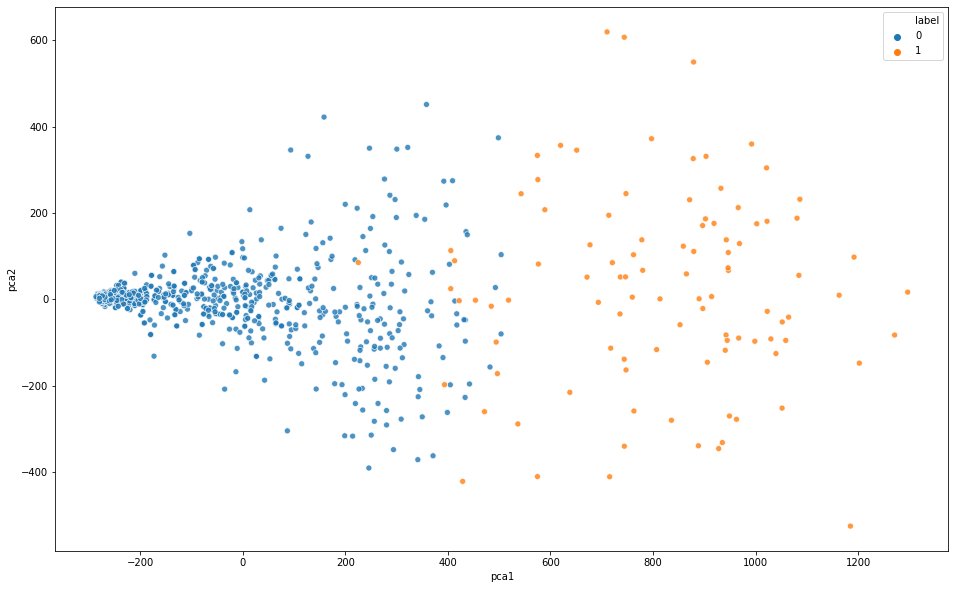

In [7]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca1", y="pca2",hue='label',
#     palette=sns.color_palette("Spectral", 12),
#     palette='tab10',
    data=df_pca,
    legend="full",
    alpha=0.8
)

### TSNE and different parameters

In [19]:
!pip install --ignore-installed MulticoreTSNE

  Using cached MulticoreTSNE-0.1.tar.gz (20 kB)
     |████████████████████████████████| 20.6 MB 2.8 MB/s eta 0:00:01
  Using cached cffi-1.14.0-cp38-cp38-manylinux1_x86_64.whl (409 kB)
  Using cached pycparser-2.20-py2.py3-none-any.whl (112 kB)
  Created wheel for MulticoreTSNE: filename=MulticoreTSNE-0.1-cp38-cp38-linux_x86_64.whl size=68541 sha256=d21347e308586476210abc51b9d83abb03591cfe95f7cf7ab64ba48b5aaba559
  Stored in directory: /home/qzt/.cache/pip/wheels/62/fc/a5/9a3b34382cf75f60f8840dba221425dbc1530ad2a5bd2786b8
Successfully built MulticoreTSNE
ERROR: pandas-profiling 2.5.0 has requirement pandas==0.25.3, but you'll have pandas 1.0.1 which is incompatible.


In [20]:
from MulticoreTSNE import MulticoreTSNE as mTSNE

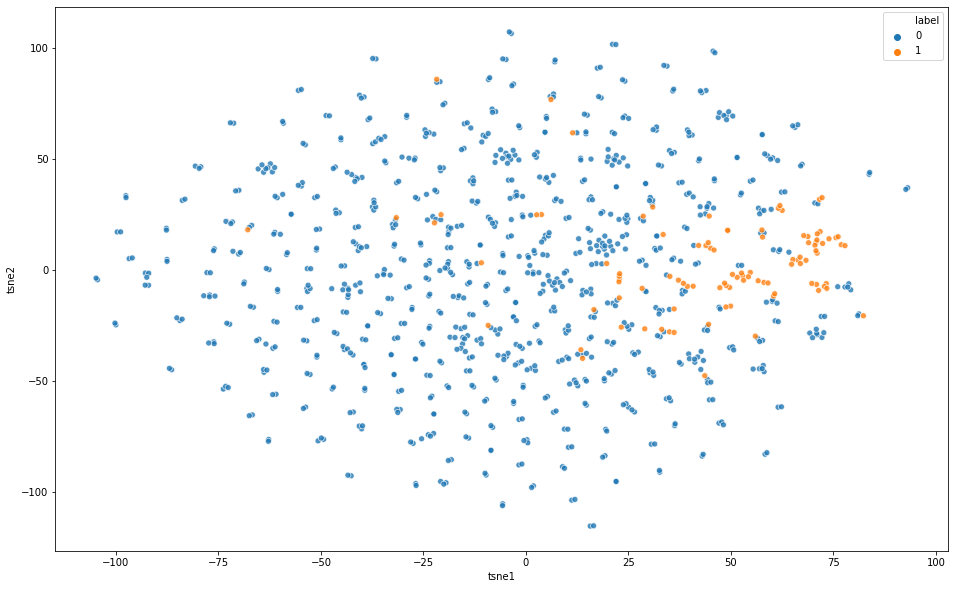

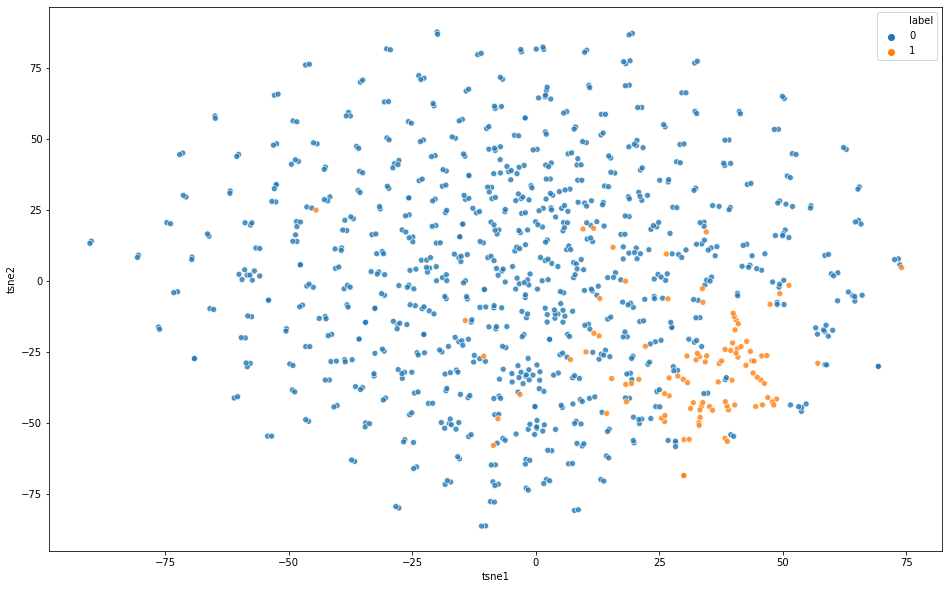

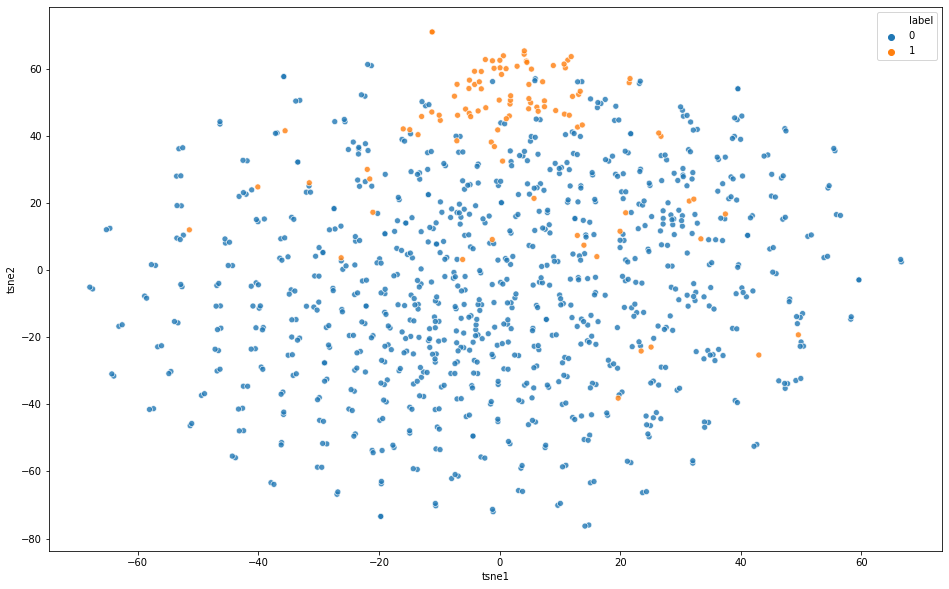

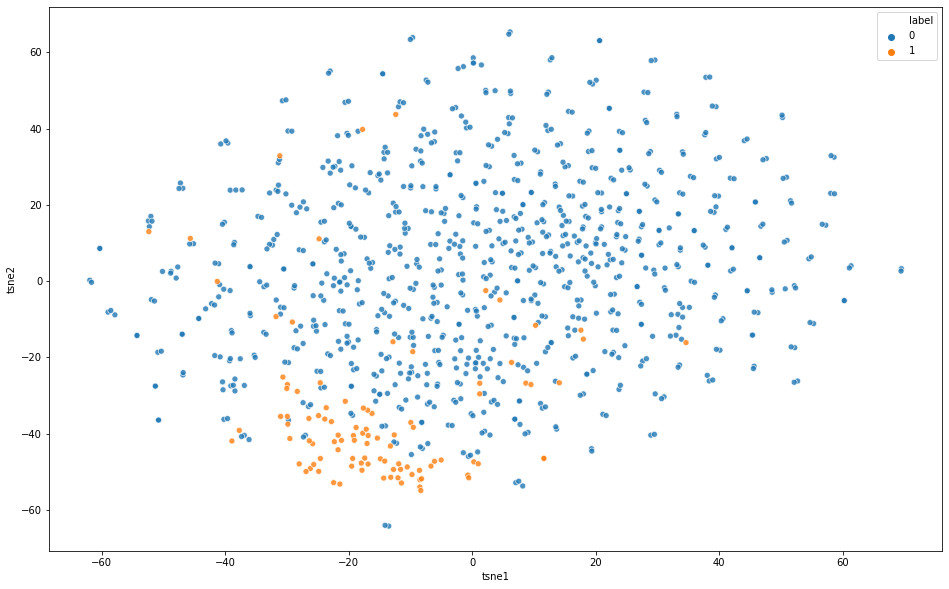

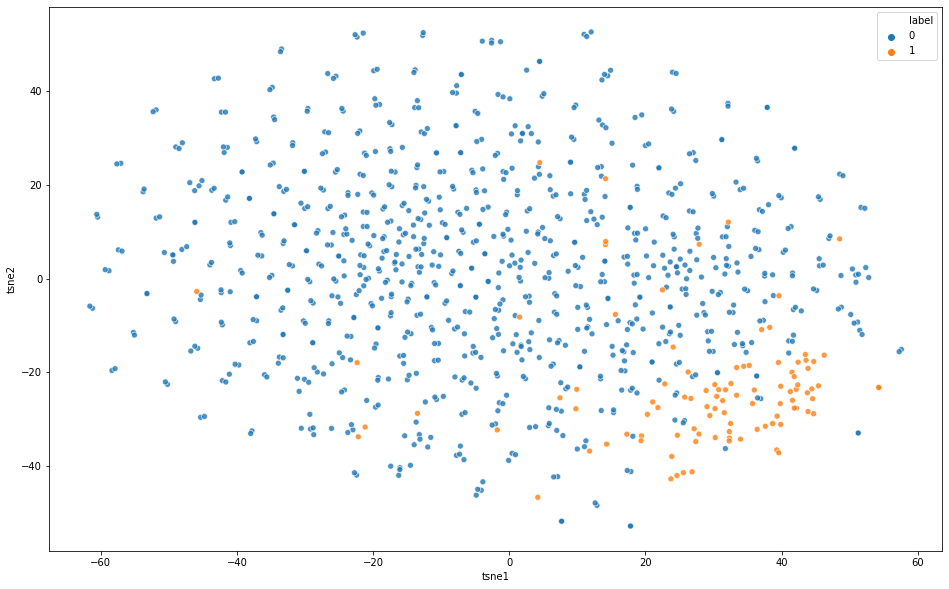

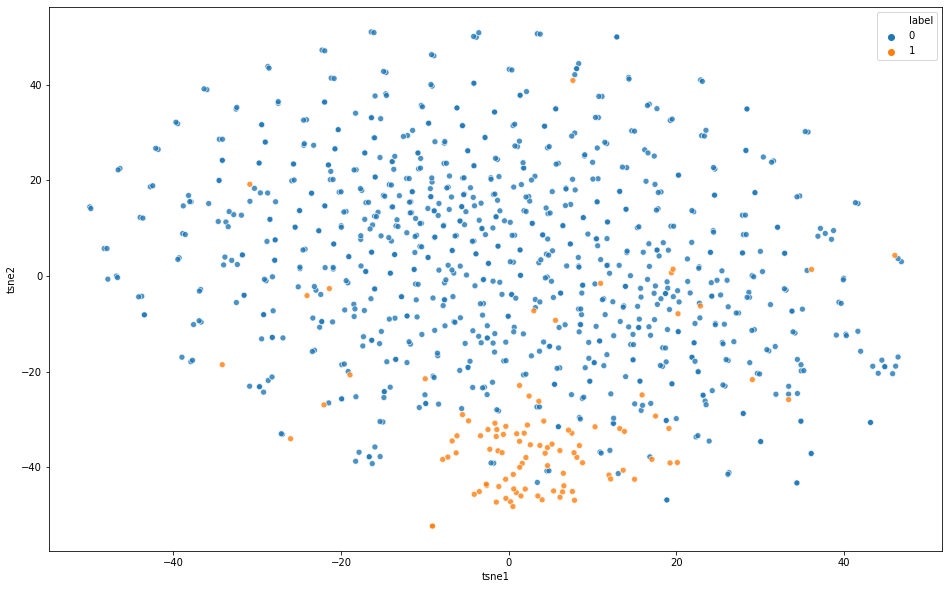

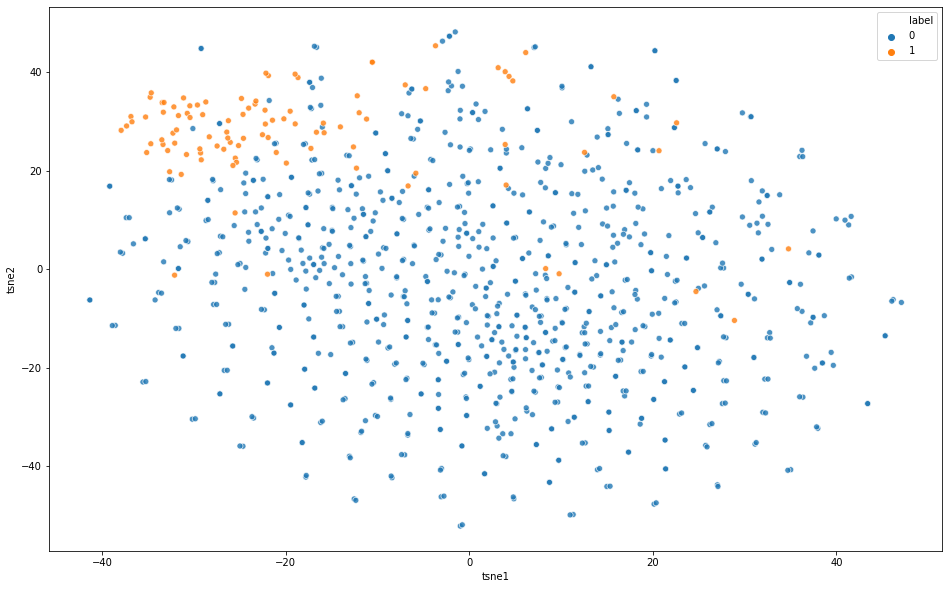

In [23]:
for perplex in range(2,15,2):
    
    tsne = mTSNE(n_components=2, verbose=2, perplexity=perplex, n_iter=1000, n_jobs=8)
    tsne_results = tsne.fit_transform(comb)

    df_pca['tsne1'] = tsne_results[:,0]
    df_pca['tsne2'] = tsne_results[:,1]

    plt.figure(figsize=(16,10))
    p = sns.scatterplot(
        x="tsne1", y="tsne2",hue='label',
        data=df_pca,
        legend="full",
        alpha=0.8
    )
    fig = p.get_figure()
    fname = f"figure/perplexity_{perplex:02}_iter_1000.png"
    fig.savefig(fname, format='png')

## Load feature layer output (layer 27) in npy format
Using dsb2018 heavy augmentated model from Martin Weigert
Input was the dsb2018 training image they used and the xenopus image from Camille Boutin, IBDM

since image sizes varies, the StarDistData2D class was used to generate fixed sized patches (X and Y). As we actually don't need Y (mask) for getting the intermediate layer output, should consider using the sample_patch function directly instead of using the StarDistData2D as data generator (sequence)

In [4]:
dsb = np.load('featurelayer_output_patch256_rep4_dsb2018_stardistAUG.npy')
centuri = np.load('featurelayer_output_patch256_rep20_centuri_stardistAUG.npy')

dsb.shape, centuri.shape

((1788, 128, 128, 128), (100, 128, 128, 128))

In [5]:
dsb = dsb.reshape((dsb.shape[0],-1))
centuri = centuri.reshape((centuri.shape[0],-1))

dsb.shape, centuri.shape

((1788, 2097152), (100, 2097152))

In [6]:
combined = np.concatenate((dsb, centuri), axis=0)
combined.shape

(1888, 2097152)

In [7]:
combined.shape

(1888, 2097152)

In [8]:
del dsb
del centuri

In [9]:
ipca = IncrementalPCA(n_components=3, batch_size=6)
combined_ipca = ipca.fit_transform(combined)
print('Explained variation per principal component: {}'.format(ipca.explained_variance_ratio_))

Explained variation per principal component: [0.19934384 0.01487869 0.01309026]


In [10]:
df_pca = pd.DataFrame(data={'pca1':combined_ipca[:,0],
                            'pca2':combined_ipca[:,1],
                            'pca3':combined_ipca[:,2]})

df_pca['pca3_bin']= pd.qcut(df_pca['pca3'],10)
df_pca['label'] = 0
df_pca.loc[1788:, 'label'] = 1
df_pca['label'].value_counts()

0    1788
1     100
Name: label, dtype: int64

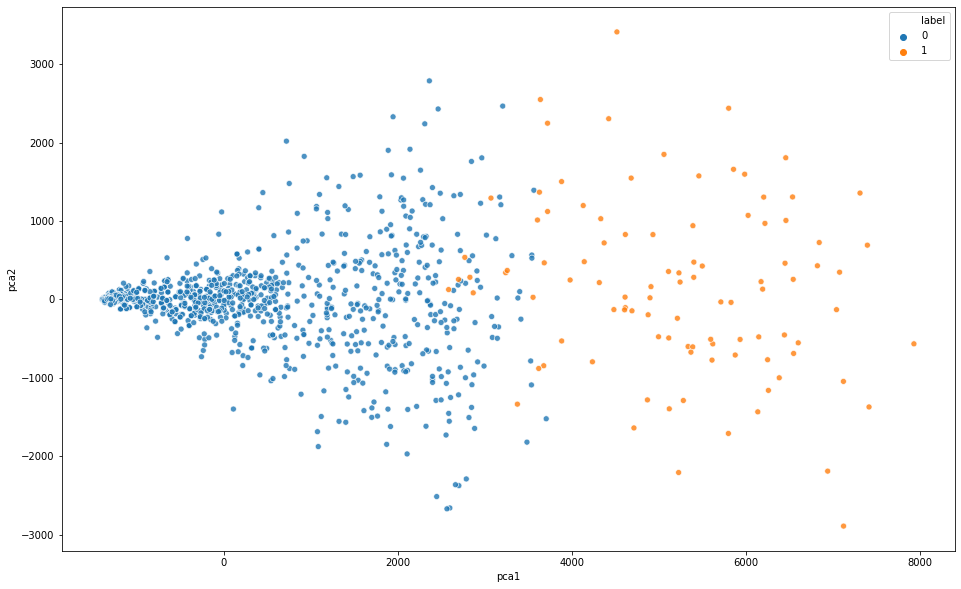

In [11]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca1", y="pca2",hue='label',
#     palette=sns.color_palette("Spectral", 12),
#     palette='tab10',
    data=df_pca,
    legend="full",
    alpha=0.8
)

In [12]:
df_pca.to_csv('combined_ipca.csv')

## do PCA on DSB2018 dataset , and apply the same transform on new dataset

In [12]:
dsb = np.load('featurelayer_output_patch256_rep4_dsb2018_stardistAUG.npy')
dsb = dsb.reshape((dsb.shape[0],-1))

ipca = IncrementalPCA(n_components=3, batch_size=6)
dsb_ipca = ipca.fit_transform(dsb)
print('Explained variation per principal component: {}'.format(ipca.explained_variance_ratio_))

Explained variation per principal component: [0.13311419 0.01548612 0.01454444]


In [6]:
dsb_ipca.shape

(1788, 3)

In [13]:
np.save('dsb_ipca_nc3_bs6.npy', dsb_ipca)

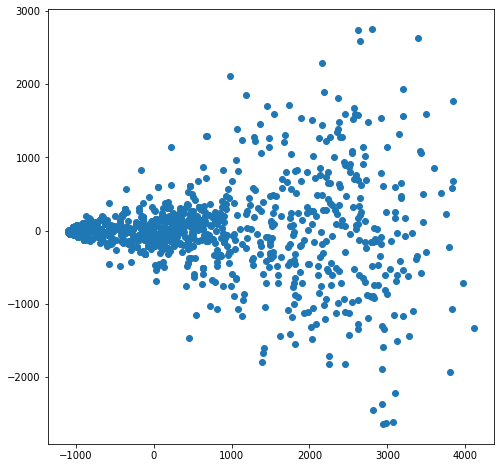

In [14]:
plt.figure(figsize=(8, 8))
plt.scatter(dsb_ipca[:, 0], dsb_ipca[:, 1])
plt.show()

In [15]:
centuri = np.load('featurelayer_output_patch256_rep20_centuri_stardistAUG.npy')
centuri = centuri.reshape((centuri.shape[0],-1))
centuri.shape

(100, 2097152)

In [16]:
centuri_ipca = ipca.transform(centuri)
centuri_ipca.shape

(100, 3)

In [17]:

df_dsb = pd.DataFrame(data={'pca1':dsb_ipca[:,0],
                            'pca2':dsb_ipca[:,1],
                            'pca3':dsb_ipca[:,2],
                            'label': 0})
df_centuri = pd.DataFrame(data={'pca1':centuri_ipca[:,0],
                            'pca2':centuri_ipca[:,1],
                            'pca3':centuri_ipca[:,2], 
                            'label':1})

df_combined = pd.concat([df_dsb, df_centuri], axis=0, ignore_index=True)
df_combined['label'].value_counts()

0    1788
1     100
Name: label, dtype: int64

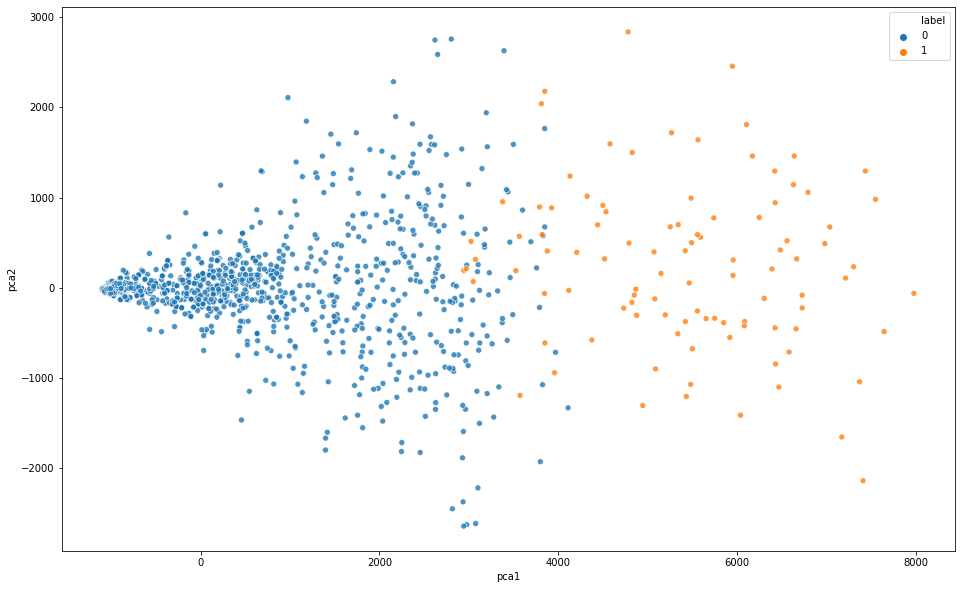

In [18]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca1", y="pca2",hue='label',
#     palette=sns.color_palette("Spectral", 12),
#     palette='tab10',
    data=df_combined,
    legend="full",
    alpha=0.8
)

## Try TSNE

In [23]:
combined.shape

(1888, 2097152)

Reduce the dsb2018 sample size to 400

In [24]:
combined1 = combined[:1788]
combined1.shape

(1788, 2097152)

In [25]:
combined2 = combined[1788:]
combined2.shape

(100, 2097152)

In [26]:
idx = np.arange(0, 1788)
np.random.shuffle(idx)
print(idx)

[1268  654  755 ...  791  414 1384]


In [27]:
combined1_sub = combined1[idx[:400]]
combined1_sub.shape

(400, 2097152)

In [28]:
combined_small = np.concatenate((combined1_sub, combined2))
combined_small.shape

(500, 2097152)

In [29]:
del combined
del combined1
del combined2
del combined1_sub

array([[6.6710785e-02, 3.6533642e+00, 9.0278935e-01, ..., 2.9779053e-01,
        1.8980470e+00, 0.0000000e+00],
       [0.0000000e+00, 4.1644130e+00, 4.7443080e-01, ..., 3.2334676e-01,
        1.9277151e+00, 0.0000000e+00],
       [0.0000000e+00, 4.0709596e+00, 4.2951006e-01, ..., 0.0000000e+00,
        4.5505099e+00, 1.4000846e+00],
       ...,
       [3.9682229e+00, 2.9707456e+00, 2.3596136e-01, ..., 8.8426094e+00,
        8.0462790e+00, 2.8853528e+00],
       [4.2393785e+00, 2.6495533e+00, 5.0237700e-03, ..., 5.2735581e+00,
        6.9964061e+00, 1.4649385e+00],
       [0.0000000e+00, 4.2280097e+00, 5.9969008e-01, ..., 6.7243009e+00,
        6.3065443e+00, 1.5610812e+00]], dtype=float32)

In [31]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=2, perplexity=15, n_iter=500)
tsne_results = tsne.fit_transform(combined_small)

In [32]:
tsne_results.shape

(500, 2)

In [33]:
df_tsne = pd.DataFrame(data={'tsne1':tsne_results[:,0],
                             'tsne2':tsne_results[:,1]})

df_tsne['label'] = 0
df_tsne.loc[400:, 'label'] = 1
df_tsne['label'].value_counts()

0    400
1    100
Name: label, dtype: int64

In [34]:
df_tsne.to_csv('combined_tsne.csv')

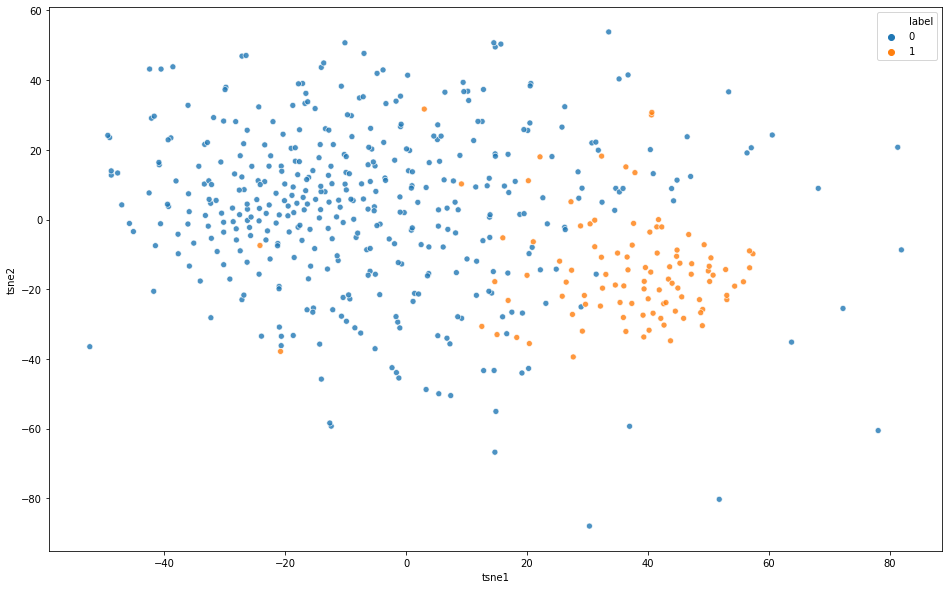

In [40]:
plt.figure(figsize=(16,10))
p = sns.scatterplot(
    x="tsne1", y="tsne2",hue='label',
#     palette=sns.color_palette("Spectral", 12),
#     palette='tab10',
    data=df_tsne,
    legend="full",
    alpha=0.8
)
fig = p.get_figure()
fig.savefig('fig/p15_iter500.png', format='png')

In [38]:
p.savefig('fig/p15_iter500.png', format='png')

<Figure size 432x288 with 0 Axes>

## Try different combination of TSNE parameters

In [ ]:
for p in range(10,50,5):
    
    tsne = TSNE(n_components=2, verbose=2, perplexity=p, n_iter=1500)
    tsne_results = tsne.fit_transform(combined_small)

    df_tsne['tsne1'] = tsne_results[:,0]
    df_tsne['tsne2'] = tsne_results[:,1]

    plt.figure(figsize=(16,10))
    p = sns.scatterplot(
        x="tsne1", y="tsne2",hue='label',
        data=df_tsne,
        legend="full",
        alpha=0.8
    )
    fig = p.get_figure()
    fname = f'figure/perplexity_{p:02}_iter_1500' + '.png'
    fig.savefig(fname, format='png')

[t-SNE] Computing 31 nearest neighbors...


In [ ]:
df_pca = pd.DataFrame(data={'pca1':pca_result[:,0],
                            'pca2':pca_result[:,1],
                            'pca3':pca_result[:,2]})

df_pca['pca3_bin']= pd.qcut(df_pca['pca-three'],10)
# df_pca['label'] = 0


In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca1", y="pca2",hue='pca3_bin',
#     palette=sns.color_palette("Spectral", 12),
    palette='hsv',
    data=df_pca,
    legend="full",
    alpha=0.5
)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

imputed_scaled = StandardScaler().fit_transform(imputed)
pca = PCA(n_components=0.9)
pca_result = pca.fit_transform(imputed_scaled)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))